In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D


# File to Load 
file_to_load = "cardio_train_project_1.csv"

# Read Purchasing File and store into Pandas data frame
cardio_data = pd.read_csv(file_to_load)



cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [18]:
# convert age from days to years and round down
age=cardio_data ["age"] / 365
age
age_rounded=age.apply(np.floor)

#insert converted ages as a new column
cardio_data["Age in Years"] = age_rounded
cardio_data

#drop column
cardio_data = cardio_data.drop("age", 1)
cardio_data

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.0
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.0
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.0
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [19]:
# #convert height from cm to feet
height_in_feet=(cardio_data["height"]*.394)/12
cardio_data["height"].apply(np.floor)
height_in_feet

# #insert converted height as a new column
cardio_data["Height in Feet"] = height_in_feet
cardio_data

# #drop column
cardio_data = cardio_data.drop("height", 1)
cardio_data


,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet
0,0,2,62.0,110,80,1,1,0,0,1,0,50.0,5.516000
1,1,1,85.0,140,90,3,1,0,0,1,1,55.0,5.122000
2,2,1,64.0,130,70,3,1,0,0,0,1,51.0,5.417500
3,3,2,82.0,150,100,1,1,0,0,1,1,48.0,5.548833
4,4,1,56.0,100,60,1,1,0,0,0,0,47.0,5.122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,76.0,120,80,1,1,1,0,1,0,52.0,5.516000
69996,99995,1,126.0,140,90,2,2,0,0,1,1,61.0,5.187667
69997,99996,2,105.0,180,90,3,1,0,1,0,1,52.0,6.008500
69998,99998,1,72.0,135,80,1,2,0,0,0,1,61.0,5.351833


In [20]:
# #convert weight from kg to lb
weight=(cardio_data["weight"]* 2.205)
cardio_data["weight"].apply(np.floor)
weight

# #insert converted weight as a new column
cardio_data["weight in lbs"] = weight
cardio_data

# #drop column
cardio_data = cardio_data.drop("weight", 1)
cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs
0,0,2,110,80,1,1,0,0,1,0,50.0,5.516000,136.710
1,1,1,140,90,3,1,0,0,1,1,55.0,5.122000,187.425
2,2,1,130,70,3,1,0,0,0,1,51.0,5.417500,141.120
3,3,2,150,100,1,1,0,0,1,1,48.0,5.548833,180.810
4,4,1,100,60,1,1,0,0,0,0,47.0,5.122000,123.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,120,80,1,1,1,0,1,0,52.0,5.516000,167.580
69996,99995,1,140,90,2,2,0,0,1,1,61.0,5.187667,277.830
69997,99996,2,180,90,3,1,0,1,0,1,52.0,6.008500,231.525
69998,99998,1,135,80,1,2,0,0,0,1,61.0,5.351833,158.760


In [21]:
height_in_inches=cardio_data["Height in Feet"] *12

cardio_data ["BMI"] = (cardio_data["weight in lbs"]/((height_in_inches) * (height_in_inches)))*703
cardio_data


,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs,BMI
0,0,2,110,80,1,1,0,0,1,0,50.0,5.516000,136.710,21.935352
1,1,1,140,90,3,1,0,0,1,1,55.0,5.122000,187.425,34.877167
2,2,1,130,70,3,1,0,0,0,1,51.0,5.417500,141.120,23.473809
3,3,2,150,100,1,1,0,0,1,1,48.0,5.548833,180.810,28.668959
4,4,1,100,60,1,1,0,0,0,0,47.0,5.122000,123.480,22.977898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,120,80,1,1,1,0,1,0,52.0,5.516000,167.580,26.888496
69996,99995,1,140,90,2,2,0,0,1,1,61.0,5.187667,277.830,50.399688
69997,99996,2,180,90,3,1,0,1,0,1,52.0,6.008500,231.525,31.308236
69998,99998,1,135,80,1,2,0,0,0,1,61.0,5.351833,158.760,27.060060


In [22]:
cardio_data['gender'] = cardio_data['gender'].replace(1, "male")
cardio_data

cardio_data['gender'] = cardio_data['gender'].replace(2, "female")
cardio_data


,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs,BMI
0,0,female,110,80,1,1,0,0,1,0,50.0,5.516000,136.710,21.935352
1,1,male,140,90,3,1,0,0,1,1,55.0,5.122000,187.425,34.877167
2,2,male,130,70,3,1,0,0,0,1,51.0,5.417500,141.120,23.473809
3,3,female,150,100,1,1,0,0,1,1,48.0,5.548833,180.810,28.668959
4,4,male,100,60,1,1,0,0,0,0,47.0,5.122000,123.480,22.977898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,1,0,1,0,52.0,5.516000,167.580,26.888496
69996,99995,male,140,90,2,2,0,0,1,1,61.0,5.187667,277.830,50.399688
69997,99996,female,180,90,3,1,0,1,0,1,52.0,6.008500,231.525,31.308236
69998,99998,male,135,80,1,2,0,0,0,1,61.0,5.351833,158.760,27.060060


In [23]:
cardio_data["weight in lbs"].max()


441.0

In [24]:
cardio_data["weight in lbs"].min()

22.05

In [25]:
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
weight_bins = [0, 100, 125, 150, 175, 200, 250, 350, 450]

# Create the names for the four bins
weight_group_names = ["0-100", "101-125", "126-150", "151-175", "176-200", "201-250", "251-350", "351-450"]

cardio_data["weight range"] = pd.cut(cardio_data["weight in lbs"], weight_bins, labels=weight_group_names, include_lowest=True)
cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs,BMI,weight range
0,0,female,110,80,1,1,0,0,1,0,50.0,5.516000,136.710,21.935352,126-150
1,1,male,140,90,3,1,0,0,1,1,55.0,5.122000,187.425,34.877167,176-200
2,2,male,130,70,3,1,0,0,0,1,51.0,5.417500,141.120,23.473809,126-150
3,3,female,150,100,1,1,0,0,1,1,48.0,5.548833,180.810,28.668959,176-200
4,4,male,100,60,1,1,0,0,0,0,47.0,5.122000,123.480,22.977898,101-125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,1,0,1,0,52.0,5.516000,167.580,26.888496,151-175
69996,99995,male,140,90,2,2,0,0,1,1,61.0,5.187667,277.830,50.399688,251-350
69997,99996,female,180,90,3,1,0,1,0,1,52.0,6.008500,231.525,31.308236,201-250
69998,99998,male,135,80,1,2,0,0,0,1,61.0,5.351833,158.760,27.060060,151-175


In [26]:
# cardio_data ["gender"].value_counts()

# cardio_data ["BMI"].max()

# # cardio_data ["weight in lbs"].max()

# # wdf=cardio_data.loc[cardio_data["weight in lbs"] == 441.0]
# # wdf

# # bdf

# Bdf=cardio_data.loc[cardio_data["BMI"] == 298.23473936458043]
# Bdf

gender=cardio_data ["gender"].value_counts()
gender






male      45530
female    24470
Name: gender, dtype: int64

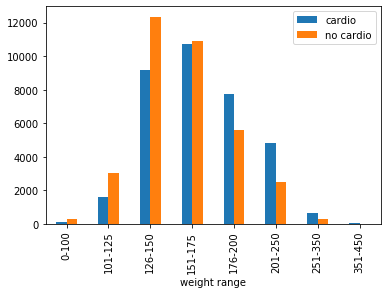

In [27]:
weight_range=cardio_data.groupby(["weight range", "cardio"]).count()["id"]
df=pd.DataFrame(weight_range.reset_index())
df

df=df.set_index("weight range")
df

no_cardio_df= df.loc[df ["cardio"] == 0 ]
no_cardio_df

cardio_df= df.loc[df ["cardio"] == 1 ]
cardio_df

combined_df= pd.DataFrame({
     "cardio": cardio_df["id"],
     "no cardio": no_cardio_df ["id"]
  })

combined_df.plot.bar()





In [28]:
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
bmi_bins = [0, 16, 17, 18.5, 25, 30, 35, 40, 299]

# Create the names for the four bins
bmi_group_names = ["Severe Thinness","Moderate Thinness", "Mild Thinness", "Normal", "Overweight", "Obese Class I", "Obese Class II", "Obese Class III"]

cardio_data["BMI range"] = pd.cut(cardio_data["BMI"], bmi_bins, labels=bmi_group_names, include_lowest=True)
cardio_data




#https://www.calculator.net/bmi-calculator.html
# severe thinness< 16
# Moderate Thinness	16 - 17
# Mild Thinness	17 - 18.5
# Normal	18.5 - 25
# Overweight	25 - 30
# Obese Class I	30 - 35
# Obese Class II	35 - 40
# Obese Class III	> 40

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs,BMI,weight range,BMI range
0,0,female,110,80,1,1,0,0,1,0,50.0,5.516000,136.710,21.935352,126-150,Normal
1,1,male,140,90,3,1,0,0,1,1,55.0,5.122000,187.425,34.877167,176-200,Obese Class I
2,2,male,130,70,3,1,0,0,0,1,51.0,5.417500,141.120,23.473809,126-150,Normal
3,3,female,150,100,1,1,0,0,1,1,48.0,5.548833,180.810,28.668959,176-200,Overweight
4,4,male,100,60,1,1,0,0,0,0,47.0,5.122000,123.480,22.977898,101-125,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,1,0,1,0,52.0,5.516000,167.580,26.888496,151-175,Overweight
69996,99995,male,140,90,2,2,0,0,1,1,61.0,5.187667,277.830,50.399688,251-350,Obese Class III
69997,99996,female,180,90,3,1,0,1,0,1,52.0,6.008500,231.525,31.308236,201-250,Obese Class I
69998,99998,male,135,80,1,2,0,0,0,1,61.0,5.351833,158.760,27.060060,151-175,Overweight


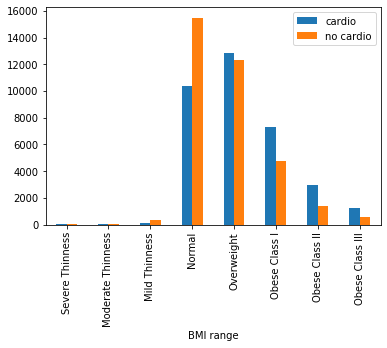

In [29]:
bmi_range=cardio_data.groupby(["BMI range", "cardio"]).count()["id"]
bmi_df=pd.DataFrame(bmi_range.reset_index())
bmi_df

bmi_df=bmi_df.set_index("BMI range")
bmi_df

bmi_no_cardio_df= bmi_df.loc[bmi_df ["cardio"] == 0 ]
bmi_no_cardio_df

bmi_cardio_df= bmi_df.loc[bmi_df ["cardio"] == 1 ]
bmi_cardio_df

bmi_combined_df= pd.DataFrame({
     "cardio": bmi_cardio_df["id"],
     "no cardio": bmi_no_cardio_df ["id"]
  })

bmi_combined_df.plot.bar()

